# REWMEM.Dep PST data Analysis

In [1]:
# Get the username and use that to set-up paths to data and figures
uname  = !whoami
uname = uname[0]
path2code = '/Users/' + uname + '/Work/Expts/Code/'
path2data = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Data/'
path2analysis = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Analysis/'
path2figs = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Analysis/Figures/'

In [2]:
%cd {path2code}

import csv, misc, os, random, re, SelfRep
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

%R suppressMessages(library('lmerTest'))
%R suppressMessages(library('lsmeans'))
%R lsm.options(disable.pbkrtest=TRUE)
%R suppressMessages(library('effsize'))
%R suppressMessages(library('afex'))
%R suppressMessages(library('QuantPsyc')) 
%R suppressMessages(library('vcd'))

/Users/ebarrick/Work/Expts/Code


array(['vcd', 'grid', 'QuantPsyc', 'MASS', 'boot', 'afex', 'reshape2',
       'effsize', 'lsmeans', 'estimability', 'lmerTest', 'lme4', 'Matrix',
       'tools', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'methods', 'base'], 
      dtype='|S12')

In [3]:
def print_full(x):
    '''Print all rows of dataframe x'''
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    return(x)

# Self Report

In [4]:
# Assemble self-report and demographics
pd.options.mode.chained_assignment = None

demo = SelfRep.demo_proc(path2data + 'RMD_SelfReport.xlsx')
cc = SelfRep.cc_proc(path2data + 'RMD_SelfReport.xlsx')
bb = SelfRep.bb_proc(path2data + 'RMD_SelfReport.xlsx')
bdi = SelfRep.bdi_proc(path2data + 'RMD_SelfReport.xlsx')
masq = SelfRep.masq_proc(path2data + 'RMD_SelfReport.xlsx')
aes = SelfRep.aes_proc(path2data + 'RMD_SelfReport.xlsx')
stai = SelfRep.stai_proc(path2data + 'RMD_SelfReport.xlsx')
shaps = SelfRep.shaps_proc(path2data + 'RMD_SelfReport.xlsx')
psqi = SelfRep.psqi_proc(path2data + 'RMD_SelfReport.xlsx')
tci = SelfRep.tci_proc(path2data + 'RMD_SelfReport.xlsx')
neo = SelfRep.neo_proc(path2data + 'RMD_SelfReport.xlsx')
poms = SelfRep.poms_proc(path2data + 'RMD_SelfReport.xlsx')
wtar = SelfRep.wtar_proc(path2data + 'RMD_SelfReport.xlsx')

sr = pd.merge(left=demo,right=bdi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=cc,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=bb,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=masq,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=aes,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=stai,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=shaps,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=psqi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=tci,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=neo,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=poms,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=wtar,left_on='subject',right_on='subject')

In [5]:
sr = sr[sr.Eligible != 0]

In [6]:
print_full(sr)

Item,subject,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,Highest Degree,Income,Notes,Eligible,BDI_total,CC_total,BAS_D,BAS_FS,BAS_RR,BIS,MASQ_GDA,MASQ_AA,MASQ_GDD,MASQ_AD,AES_total,STAI_Trait,STAI_State,SHAPS,PSQI_Duration,PSQI_Disturb,PSQI_Latency,PSQI_DayDys,PSQI_Efficiency,PSQI_Quality,PSQI_Medication,PSQI_Total,TCI_NovSeek,TCI_HA,TCI_RewDep,TCI_Persist,TCI_SelfDir,TCI_CoOp,TCI_SelfTrans,TCI_Valid,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,POMS_TenseAnx,POMS_DepDeject,POMS_AngHost,POMS_VigorAct,POMS_FatigueInert,POMS_ConfuseBewild,POMS_TotalMoodDisturb,WTAR_NatEng,WTAR_StdScore
2,RMD003,MDD,43,F,W,NH,Separated,technical college,12.0,chef,NaN,NaN,NaN,1,18,13.00,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96
3,RMD004,HC,37,M,W,NH,Never Married,four year college,16.0,Accountant,BS,10-25k,NaN,1,2,13.00,12,15,18,13,12,17,12,42,21,23,23,1,1,0,0,0,0,0,0,1,63,29,59,85,86,95,38,valid,14,47,44,48,49,0,0,0,15,3,2,-10,yes,105
4,RMD005,HC,27,M,W,H,Never Married,graduate or professional school,17.0,Student,MA,<10K,NaN,1,3,13.00,9,11,17,17,12,17,17,40,25,27,31,0,0,1,0,0,0,1,0,2,63,43,68,70,83,85,32,valid,27,45,38,47,42,3,2,1,11,1,4,0,yes,121
5,RMD006,HC,43,M,W,NH,Married or living with someone as if married,four year college,16.0,lab manager,BS,75-100K,NaN,1,0,12.50,11,10,18,18,11,17,12,36,18,20,21,0,0,1,0,0,0,0,0,1,54,43,72,78,78,74,44,valid,26,42,35,45,49,0,0,0,15,0,3,-12,yes,114
6,RMD007,HC,20,F,W,NH,Never Married,some college,14.0,student,NaN,>100K,NaN,1,3,13.00,10,9,16,20,18,17,23,53,27,32,38,0,0,1,2,1,0,1,0,5,40,63,77,73,69,76,37,valid,27,39,37,47,38,3,3,1,9,6,6,10,yes,125
7,RMD009,HC,46,M,W,NH,never married,four year college,16.0,self employed,BS,25-50K,NaN,1,0,13.00,16,13,19,20,12,18,14,51,27,28,35,3,0,1,2,0,0,1,0,4,59,45,81,89,85,83,53,valid,24,45,30,41,51,3,1,1,14,2,3,-4,yes,105
8,RMD010,HC,55,F,W,NH,Never Married,graduate or professional school,16.0,volunteer coordinator,MA,50-75K,NaN,1,0,13.00,9,13,16,20,11,18,12,41,20,20,22,1,2,2,1,0,1,1,0,7,43,51,88,74,94,90,34,valid,17,43,32,48,49,0,3,3,10,5,3,4,yes,122
9,RMD011,HC,24,F,W,NH,never married,graduate or professional school,17.0,medical journalist,MS,10-25K,NaN,1,6,13.00,13,15,19,25,16,27,22,68,29,25,35,0,0,2,3,1,0,2,0,8,69,63,74,84,77,76,57,valid,33,40,45,42,45,4,3,8,9,6,2,14,yes,125
10,RMD012,HC,37,F,Af,NH,never married,graduate or professional school,19.0,student,MA,<10K,NaN,1,0,13.00,15,14,20,14,11,19,12,35,18,20,22,0,0,1,1,0,0,0,0,2,44,26,83,89,95,89,62,valid,14,50,38,57,58,0,0,1,18,0,3,-14,yes,98
11,RMD013,MDD,46,M,W,NH,never married,four year college,16.0,museum educator,BA,50-75K,NaN,1,22,13.00,11,12,13,14,18,25,36,93,52,45,52,2,0,2,NaN,1,0,1,0,NaN,61,64,58,51,59,65,23,valid,40,28,30,39,32,5,8,7,3,10,4,31,yes,125


### *Demographics*

Group       
HC     count    41.000000
       mean     29.853659
       std       8.670528
       min      20.000000
       25%      24.000000
       50%      27.000000
       75%      37.000000
       max      55.000000
MDD    count    37.000000
       mean     30.540541
       std      12.471288
       min      18.000000
       25%      21.000000
       50%      27.000000
       75%      34.000000
       max      64.000000
dtype: float64
Between-group t-tests on Age
t(76) = -0.28, p = 0.777


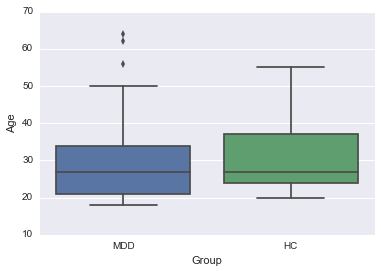

In [7]:
print (sr.groupby('Group')['Age'].describe())

print ('Between-group t-tests on Age')
misc.ttest_2s(sr[sr.Group == 'HC']['Age'],sr[sr.Group == 'MDD']['Age'])

sns.boxplot(y='Age', x='Group', data = sr)

Group       
HC     count    41.000000
       mean     16.743902
       std       2.239202
       min      12.000000
       25%      16.000000
       50%      16.000000
       75%      18.000000
       max      22.000000
MDD    count    37.000000
       mean     15.932432
       std       2.925373
       min      12.000000
       25%      14.000000
       50%      16.000000
       75%      17.000000
       max      25.000000
dtype: float64
Between-group t-tests on Education
t(76) = 1.38, p = 0.171


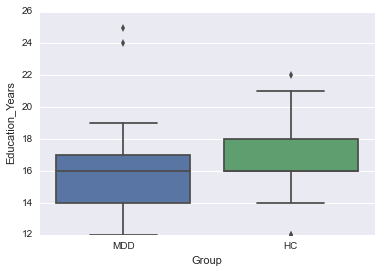

In [8]:
print (sr.groupby('Group')['Education_Years'].describe())

print ('Between-group t-tests on Education')
misc.ttest_2s(sr[sr.Group == 'HC']['Education_Years'],sr[sr.Group == 'MDD']['Education_Years'])

sns.boxplot(y='Education_Years', x='Group', data = sr)

### *BDI*

Group       
HC     count    41.000000
       mean      1.365854
       std       2.405786
       min       0.000000
       25%       0.000000
       50%       0.000000
       75%       2.000000
       max      12.000000
MDD    count    37.000000
       mean     28.243243
       std       8.162943
       min      16.000000
       25%      22.000000
       50%      28.000000
       75%      35.000000
       max      47.000000
dtype: float64
Between-group t-tests on BDI
t(76) = -20.15, p = 0.000


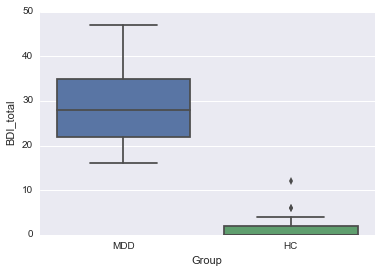

In [9]:
print (sr.groupby('Group')['BDI_total'].describe())

print ('Between-group t-tests on BDI')
misc.ttest_2s(sr[sr.Group == 'HC']['BDI_total'],sr[sr.Group == 'MDD']['BDI_total'])

sns.boxplot(y='BDI_total', x='Group', data = sr)

### *BIS-BAS*

Between-group t-tests on BIS
t(76) = -6.08, p = 0.000
Between-group t-tests on BAS_D
t(76) = 3.21, p = 0.002
Between-group t-tests on BAS_FS
t(76) = 3.62, p = 0.001
Between-group t-tests on BAS_RR
t(76) = 1.56, p = 0.123


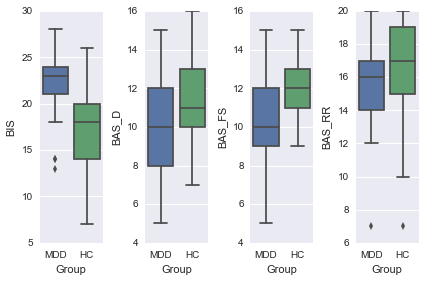

In [10]:
print ('Between-group t-tests on BIS')
misc.ttest_2s(sr[sr.Group == 'HC']['BIS'],sr[sr.Group == 'MDD']['BIS'])
print ('Between-group t-tests on BAS_D')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_D'],sr[sr.Group == 'MDD']['BAS_D'])
print ('Between-group t-tests on BAS_FS')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_FS'],sr[sr.Group == 'MDD']['BAS_FS'])
print ('Between-group t-tests on BAS_RR')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_RR'],sr[sr.Group == 'MDD']['BAS_RR'])


fig = plt.figure()
bis = fig.add_subplot(141)
sns.boxplot(y='BIS', x='Group', data = sr)
bis = fig.add_subplot(142)
sns.boxplot(y='BAS_D', x='Group', data = sr)
bas_fs = fig.add_subplot(143)
sns.boxplot(y='BAS_FS', x='Group', data = sr)
bas_rr = fig.add_subplot(144)
sns.boxplot(y='BAS_RR', x='Group', data = sr)
fig.tight_layout()

### *MASQ*

Between-group t-tests on MASQ_GDA
t(76) = -9.07, p = 0.000
Between-group t-tests on MASQ_AA
t(76) = -5.22, p = 0.000
Between-group t-tests on MASQ_GDD
t(76) = -15.90, p = 0.000
Between-group t-tests on MASQ_AD
t(76) = -17.61, p = 0.000


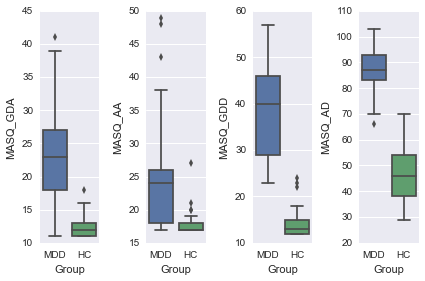

In [11]:
print ('Between-group t-tests on MASQ_GDA')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDA'],sr[sr.Group == 'MDD']['MASQ_GDA'])
print ('Between-group t-tests on MASQ_AA')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AA'],sr[sr.Group == 'MDD']['MASQ_AA'])
print ('Between-group t-tests on MASQ_GDD')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDD'],sr[sr.Group == 'MDD']['MASQ_GDD'])
print ('Between-group t-tests on MASQ_AD')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AD'],sr[sr.Group == 'MDD']['MASQ_AD'])

fig = plt.figure()
gda = fig.add_subplot(141)
sns.boxplot(y='MASQ_GDA', x='Group', data = sr)
aa = fig.add_subplot(142)
sns.boxplot(y='MASQ_AA', x='Group', data = sr)
gdd = fig.add_subplot(143)
sns.boxplot(y='MASQ_GDD', x='Group', data = sr)
ad = fig.add_subplot(144)
sns.boxplot(y='MASQ_AD', x='Group', data = sr)
fig.tight_layout()

### *AES*

Between-group t-tests on AES
t(76) = -15.99, p = 0.000


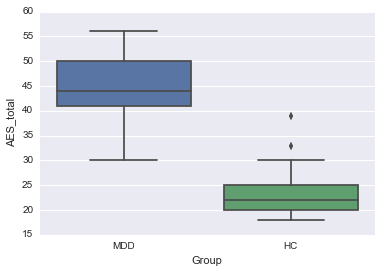

In [12]:
print ('Between-group t-tests on AES')
misc.ttest_2s(sr[sr.Group == 'HC']['AES_total'],sr[sr.Group == 'MDD']['AES_total'])

sns.boxplot(y='AES_total', x='Group', data = sr)

### *STAI*

Between-group t-tests on STAI trait
t(76) = -11.53, p = 0.000
Between-group t-tests on STAI state
t(76) = -18.06, p = 0.000


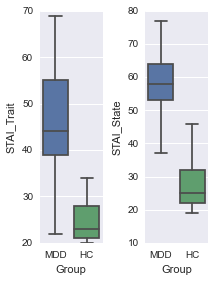

In [13]:
print ('Between-group t-tests on STAI trait')
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_Trait'],sr[sr.Group == 'MDD']['STAI_Trait'])
print ('Between-group t-tests on STAI state')
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_State'],sr[sr.Group == 'MDD']['STAI_State'])

fig = plt.figure()
trait = fig.add_subplot(141)
sns.boxplot(y='STAI_Trait', x='Group', data = sr)
state = fig.add_subplot(142)
sns.boxplot(y='STAI_State', x='Group', data = sr)
fig.tight_layout()

### *SHAPS*

Between-group t-tests on SHAPS
t(76) = -9.45, p = 0.000


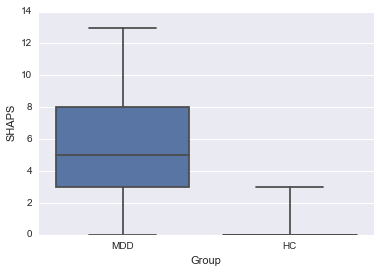

In [14]:
print ('Between-group t-tests on SHAPS')
misc.ttest_2s(sr[sr.Group == 'HC']['SHAPS'],sr[sr.Group == 'MDD']['SHAPS'])

sns.boxplot(y='SHAPS', x='Group', data = sr)

### *PSQI*

Between-group t-tests on PSQI duration
t(76) = -1.98, p = 0.051
Between-group t-tests on PSQI Distubance
t(76) = -2.44, p = 0.017
Between-group t-tests on PSQI Latency
t(76) = nan, p = nan
Between-group t-tests on PSQI Daytime Disturbance
t(76) = -13.66, p = 0.000
Between-group t-tests on PSQI Efficiency
t(76) = -2.22, p = 0.029
Between-group t-tests on PSQI Quality
t(76) = nan, p = nan
Between-group t-tests on PSQI Medication
t(76) = -0.84, p = 0.404
Between-group t-tests on PSQI Total
t(76) = nan, p = nan


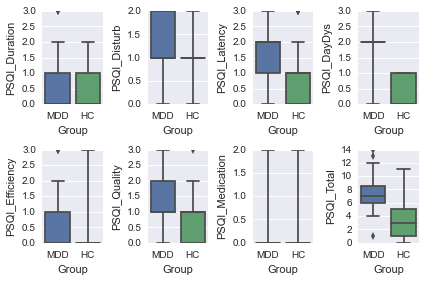

In [15]:
# Check on nan t-tests (prob have missing values)

print ('Between-group t-tests on PSQI duration')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Duration'],sr[sr.Group == 'MDD']['PSQI_Duration'])
print ('Between-group t-tests on PSQI Distubance')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Disturb'],sr[sr.Group == 'MDD']['PSQI_Disturb'])
print ('Between-group t-tests on PSQI Latency')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Latency'],sr[sr.Group == 'MDD']['PSQI_Latency'])
print ('Between-group t-tests on PSQI Daytime Disturbance')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_DayDys'],sr[sr.Group == 'MDD']['PSQI_DayDys'])
print ('Between-group t-tests on PSQI Efficiency')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Efficiency'],sr[sr.Group == 'MDD']['PSQI_Efficiency'])
print ('Between-group t-tests on PSQI Quality')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Quality'],sr[sr.Group == 'MDD']['PSQI_Quality'])
print ('Between-group t-tests on PSQI Medication')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Medication'],sr[sr.Group == 'MDD']['PSQI_Medication'])
print ('Between-group t-tests on PSQI Total')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Total'],sr[sr.Group == 'MDD']['PSQI_Total'])
fig = plt.figure()
dur = fig.add_subplot(241)
sns.boxplot(y='PSQI_Duration', x='Group', data = sr)
dist = fig.add_subplot(242)
sns.boxplot(y='PSQI_Disturb', x='Group', data = sr)
lat = fig.add_subplot(243)
sns.boxplot(y='PSQI_Latency', x='Group', data = sr)
day = fig.add_subplot(244)
sns.boxplot(y='PSQI_DayDys', x='Group', data = sr)
eff = fig.add_subplot(245)
sns.boxplot(y='PSQI_Efficiency', x='Group', data = sr)
qual = fig.add_subplot(246)
sns.boxplot(y='PSQI_Quality', x='Group', data = sr)
med = fig.add_subplot(247)
sns.boxplot(y='PSQI_Medication', x='Group', data = sr)
tot = fig.add_subplot(248)
sns.boxplot(y='PSQI_Total', x='Group', data = sr) 
fig.tight_layout()

### *TCI*

In [16]:
sr.subject.nunique()

78

In [17]:
#RMD060 and RMD062 == invalid
sr.TCI_Valid.value_counts()

valid    78
dtype: int64

Between-group t-tests on Novelty Seeking
t(76) = -1.35, p = 0.181
Between-group t-tests on Harm avoidance
t(76) = -9.92, p = 0.000
Between-group t-tests on Reward dependence
t(76) = 2.74, p = 0.008
Between-group t-tests on Persistence
t(76) = 8.03, p = 0.000
Between-group t-tests on Self-Directedness 
t(76) = 11.19, p = 0.000
Between-group t-tests on Cooperativeness
t(76) = 3.39, p = 0.001
Between-group t-tests on Self Transcendence
t(76) = 1.17, p = 0.245


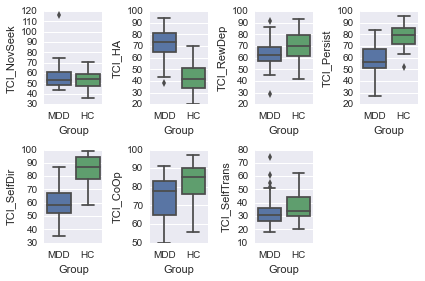

In [18]:
print ('Between-group t-tests on Novelty Seeking')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_NovSeek'],sr[sr.Group == 'MDD']['TCI_NovSeek'])
print ('Between-group t-tests on Harm avoidance')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_HA'],sr[sr.Group == 'MDD']['TCI_HA'])
print ('Between-group t-tests on Reward dependence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_RewDep'],sr[sr.Group == 'MDD']['TCI_RewDep'])
print ('Between-group t-tests on Persistence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_Persist'],sr[sr.Group == 'MDD']['TCI_Persist'])
print ('Between-group t-tests on Self-Directedness ')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfDir'],sr[sr.Group == 'MDD']['TCI_SelfDir'])
print ('Between-group t-tests on Cooperativeness')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_CoOp'],sr[sr.Group == 'MDD']['TCI_CoOp'])
print ('Between-group t-tests on Self Transcendence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfTrans'],sr[sr.Group == 'MDD']['TCI_SelfTrans'])

fig = plt.figure()
nov = fig.add_subplot(241)
sns.boxplot(y='TCI_NovSeek', x='Group', data = sr)
ha = fig.add_subplot(242)
sns.boxplot(y='TCI_HA', x='Group', data = sr)
rewd = fig.add_subplot(243)
sns.boxplot(y='TCI_RewDep', x='Group', data = sr)
per = fig.add_subplot(244)
sns.boxplot(y='TCI_Persist', x='Group', data = sr)
self = fig.add_subplot(245)
sns.boxplot(y='TCI_SelfDir', x='Group', data = sr)
coop = fig.add_subplot(246)
sns.boxplot(y='TCI_CoOp', x='Group', data = sr)
med = fig.add_subplot(247)
sns.boxplot(y='TCI_SelfTrans', x='Group', data = sr) 
fig.tight_layout()

### *NEO*

Between-group t-tests on Neuroticism
t(76) = -16.35, p = 0.000
Between-group t-tests on Exraversion
t(76) = 9.90, p = 0.000
Between-group t-tests on Openness to Experience
t(76) = 0.71, p = 0.481
Between-group t-tests on Agreeableness
t(76) = 2.88, p = 0.005
Between-group t-tests on Conscientiousness
t(76) = 8.06, p = 0.000


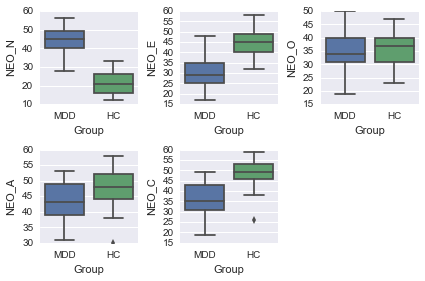

In [19]:
print ('Between-group t-tests on Neuroticism')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_N'],sr[sr.Group == 'MDD']['NEO_N'])
print ('Between-group t-tests on Exraversion')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_E'],sr[sr.Group == 'MDD']['NEO_E'])
print ('Between-group t-tests on Openness to Experience')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_O'],sr[sr.Group == 'MDD']['NEO_O'])
print ('Between-group t-tests on Agreeableness')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_A'],sr[sr.Group == 'MDD']['NEO_A'])
print ('Between-group t-tests on Conscientiousness')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_C'],sr[sr.Group == 'MDD']['NEO_C'])

fig = plt.figure()
neur = fig.add_subplot(231)
sns.boxplot(y='NEO_N', x='Group', data = sr)
ext = fig.add_subplot(232)
sns.boxplot(y='NEO_E', x='Group', data = sr)
ope = fig.add_subplot(233)
sns.boxplot(y='NEO_O', x='Group', data = sr)
agr = fig.add_subplot(234)
sns.boxplot(y='NEO_A', x='Group', data = sr)
con = fig.add_subplot(235)
sns.boxplot(y='NEO_C', x='Group', data = sr)
fig.tight_layout()

### *POMS*

Between-group t-tests on Tension-Anxiety
t(76) = -10.09, p = 0.000
Between-group t-tests on Depression
t(76) = -15.79, p = 0.000
Between-group t-tests on Anger-Hostility
t(76) = -6.29, p = 0.000
Between-group t-tests on Vigor-Activity
t(76) = 12.68, p = 0.000
Between-group t-tests on Fatigue
t(76) = -14.52, p = 0.000
Between-group t-tests on Confusion-Bewilderment
t(76) = -3.77, p = 0.000
Between-group t-tests on Total Mood Disturbance
t(76) = -16.39, p = 0.000


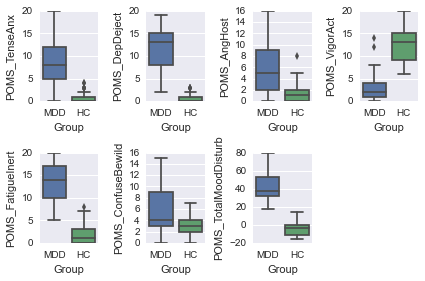

In [20]:
print ('Between-group t-tests on Tension-Anxiety')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TenseAnx'],sr[sr.Group == 'MDD']['POMS_TenseAnx'])
print ('Between-group t-tests on Depression')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_DepDeject'],sr[sr.Group == 'MDD']['POMS_DepDeject'])
print ('Between-group t-tests on Anger-Hostility')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_AngHost'],sr[sr.Group == 'MDD']['POMS_AngHost'])
print ('Between-group t-tests on Vigor-Activity')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_VigorAct'],sr[sr.Group == 'MDD']['POMS_VigorAct'])
print ('Between-group t-tests on Fatigue')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_FatigueInert'],sr[sr.Group == 'MDD']
              ['POMS_FatigueInert'])
print ('Between-group t-tests on Confusion-Bewilderment')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_ConfuseBewild'],sr[sr.Group == 'MDD']
              ['POMS_ConfuseBewild'])
print ('Between-group t-tests on Total Mood Disturbance')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TotalMoodDisturb'],sr[sr.Group == 'MDD']
              ['POMS_TotalMoodDisturb'])

fig = plt.figure()
tax = fig.add_subplot(241)
sns.boxplot(y='POMS_TenseAnx', x='Group', data = sr)
dep = fig.add_subplot(242)
sns.boxplot(y='POMS_DepDeject', x='Group', data = sr)
ah = fig.add_subplot(243)
sns.boxplot(y='POMS_AngHost', x='Group', data = sr)
va = fig.add_subplot(244)
sns.boxplot(y='POMS_VigorAct', x='Group', data = sr)
fat = fig.add_subplot(245)
sns.boxplot(y='POMS_FatigueInert', x='Group', data = sr)
cb = fig.add_subplot(246)
sns.boxplot(y='POMS_ConfuseBewild', x='Group', data = sr)
tot = fig.add_subplot(247)
sns.boxplot(y='POMS_TotalMoodDisturb', x='Group', data = sr)
fig.tight_layout()

### *WTAR*

Between-group t-tests on WTAR
t(76) = 0.14, p = 0.890


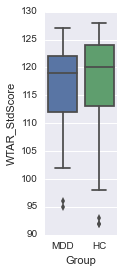

In [21]:
# Figure out why nan for t-test
print ('Between-group t-tests on WTAR')
misc.ttest_2s(sr[sr.Group == 'HC']['WTAR_StdScore'],sr[sr.Group == 'MDD']['WTAR_StdScore'])

fig = plt.figure()
trait = fig.add_subplot(141)
sns.boxplot(y='WTAR_StdScore', x='Group', data = sr)

# PST Train

In [22]:
# Assemble the PST training data

%cd {path2data}

e_dfs = []
ef_d = re.compile('fMRI_train')

subjects = !ls -d RMD0*

for subject in subjects:
    curr_path = path2data + subject + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            ef_m = ef_d.search(filename)
            if ef_m:
                file_path = curr_path + filename
                e_df = pd.read_csv(file_path)
                e_df['subject'] = subject
                e_dfs.append(e_df)
                
train_data = pd.concat(e_dfs)
train_data['lnRT'] = train_data.trial_RT.apply(np.log)
train_columns = ['subject','group','trial_num','block','trial_RT','lnRT','accuracy',
                 'left_stim','left_stim_number','right_stim','right_stim_number',
                 'object_onset','object_duration','response','response_onset','isi_onset',
                 'isi_duration','scheduled_outcome','feedback','feedback_onset',
                 'feedback_duration','iti_onset','iti_duration']


/Users/ebarrick/Work/Expts/REWMEM/Version4/Data


In [23]:
train_data['group'].replace(0, 'HC',inplace=True)
train_data['group'].replace(1, 'MDD',inplace=True)

train_data = train_data.reindex(columns=train_columns)

In [24]:
#Merging the PST train data with the self report data
train_full = pd.merge(left=train_data, right=sr, left_on='subject',right_on='subject')

In [25]:
"""Function to look for outliers"""

def OutCheck(in_df):
    dfs = []
    for sub in in_df.subject.unique():
        outlier = []
        df = in_df[in_df.subject == sub]
        for i, row_i in df.iterrows():
            if np.isnan(row_i.trial_RT):
                outlier.append(np.nan)
            elif abs(row_i.trial_RT-df.trial_RT.mean()) <= df.trial_RT.std()*3:
                outlier.append(0)
            else:
                outlier.append(1)
        df['outlier'] = outlier
        dfs.append(df)
    out = pd.concat(dfs)
    return out

train = OutCheck(train_full)

In [26]:
print ('Number of trials that are outliers for each subject:')
df1 = train[train['outlier'] == 1]
print (df1.groupby('subject')['outlier'].count())

Number of trials that are outliers for each subject:
subject
RMD003     1
RMD004     3
RMD005     3
RMD007    17
RMD009     1
RMD010     2
RMD011     1
RMD013     7
RMD014     1
RMD016     1
RMD017    16
RMD018     1
RMD019    21
RMD020     8
RMD021    12
RMD023     3
RMD027     1
RMD028    11
RMD030     4
RMD031     4
RMD034     1
RMD035     1
RMD036     3
RMD037     3
RMD038     2
RMD040     4
RMD041     1
RMD042     2
RMD043     1
RMD044     9
RMD045     1
RMD046     2
RMD048     2
RMD049     1
RMD050     6
RMD051     5
RMD053     1
RMD054     1
RMD055    12
RMD056     1
RMD057     1
RMD058     1
RMD059     1
RMD061     6
RMD063     3
RMD064    20
RMD065     1
RMD066     1
RMD067     1
RMD069    11
RMD070     3
RMD071     2
RMD072     1
RMD075     3
RMD076     1
RMD078     2
RMD079     1
RMD081    20
RMD082    11
RMD084     3
RMD085     2
RMD086     2
RMD089     3
RMD090     3
RMD091    22
RMD092    18
RMD093     5
Name: outlier, dtype: int64


In [27]:
# Count number of trials with no response, drop them, and drop outliers.
print ('Number of trials with no response: ' + str(len(train[train.trial_RT == 999]))) 
train_clean = train[~((train.trial_RT == 999) | (train.outlier == 1))]

Number of trials with no response: 597


In [28]:
def make_pair(data):
    '''take left and right stimulus output pair'''
    d = {1:'AB', 2:'CD',3:'EF',4:'EF',5:'CD',6:'AB'}
    pair = d[data]
    return pair

train_clean['pair'] = train_clean.left_stim_number.apply(make_pair)

In [29]:
train_clean.head()

,subject,group,trial_num,block,trial_RT,lnRT,accuracy,left_stim,left_stim_number,right_stim,right_stim_number,object_onset,object_duration,response,response_onset,isi_onset,isi_duration,scheduled_outcome,feedback,feedback_onset,feedback_duration,iti_onset,iti_duration,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,Highest Degree,Income,Notes,Eligible,BDI_total,CC_total,BAS_D,BAS_FS,BAS_RR,BIS,MASQ_GDA,MASQ_AA,MASQ_GDD,MASQ_AD,AES_total,STAI_Trait,STAI_State,SHAPS,PSQI_Duration,PSQI_Disturb,PSQI_Latency,PSQI_DayDys,PSQI_Efficiency,PSQI_Quality,PSQI_Medication,PSQI_Total,TCI_NovSeek,TCI_HA,TCI_RewDep,TCI_Persist,TCI_SelfDir,TCI_CoOp,TCI_SelfTrans,TCI_Valid,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,POMS_TenseAnx,POMS_DepDeject,POMS_AngHost,POMS_VigorAct,POMS_FatigueInert,POMS_ConfuseBewild,POMS_TotalMoodDisturb,WTAR_NatEng,WTAR_StdScore,outlier,pair
0,RMD003,MDD,1,1,1.467,0.383219,0,Stimuli/1.bmp,2,Stimuli/5.bmp,5,14.970,3,right,16.437,17.970,4.984,0,reward,22.954,1.000,23.954,0.517,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,CD
1,RMD003,MDD,2,1,1.134,0.125751,0,Stimuli/4.bmp,3,Stimuli/2.bmp,4,24.471,3,right,25.605,27.471,0.500,1,zero,27.971,1.000,28.970,0.500,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,EF
2,RMD003,MDD,3,1,0.917,-0.086648,1,Stimuli/6.bmp,1,Stimuli/3.bmp,6,29.471,3,left,30.388,32.471,0.500,1,reward,32.971,0.983,33.954,4.017,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,AB
3,RMD003,MDD,4,1,1.200,0.182322,0,Stimuli/6.bmp,1,Stimuli/3.bmp,6,37.972,3,right,39.172,40.971,0.500,1,zero,41.471,0.983,42.455,2.017,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,AB
4,RMD003,MDD,5,1,1.500,0.405465,0,Stimuli/5.bmp,5,Stimuli/1.bmp,2,44.472,3,left,45.973,47.472,1.000,1,zero,48.472,0.983,49.455,0.517,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,CD


In [30]:
#Find out which participants responded <90% of the time
g = train_clean.groupby(['subject', 'group']).trial_num.count()
df = g.to_frame()
df.reset_index(inplace=True)

df.loc[(df["trial_num"] < 216)]

,subject,group,trial_num
3,RMD006,HC,191
11,RMD015,HC,201
37,RMD045,MDD,179
57,RMD068,MDD,190
65,RMD077,MDD,189
69,RMD082,MDD,120


### Train Reaction Time

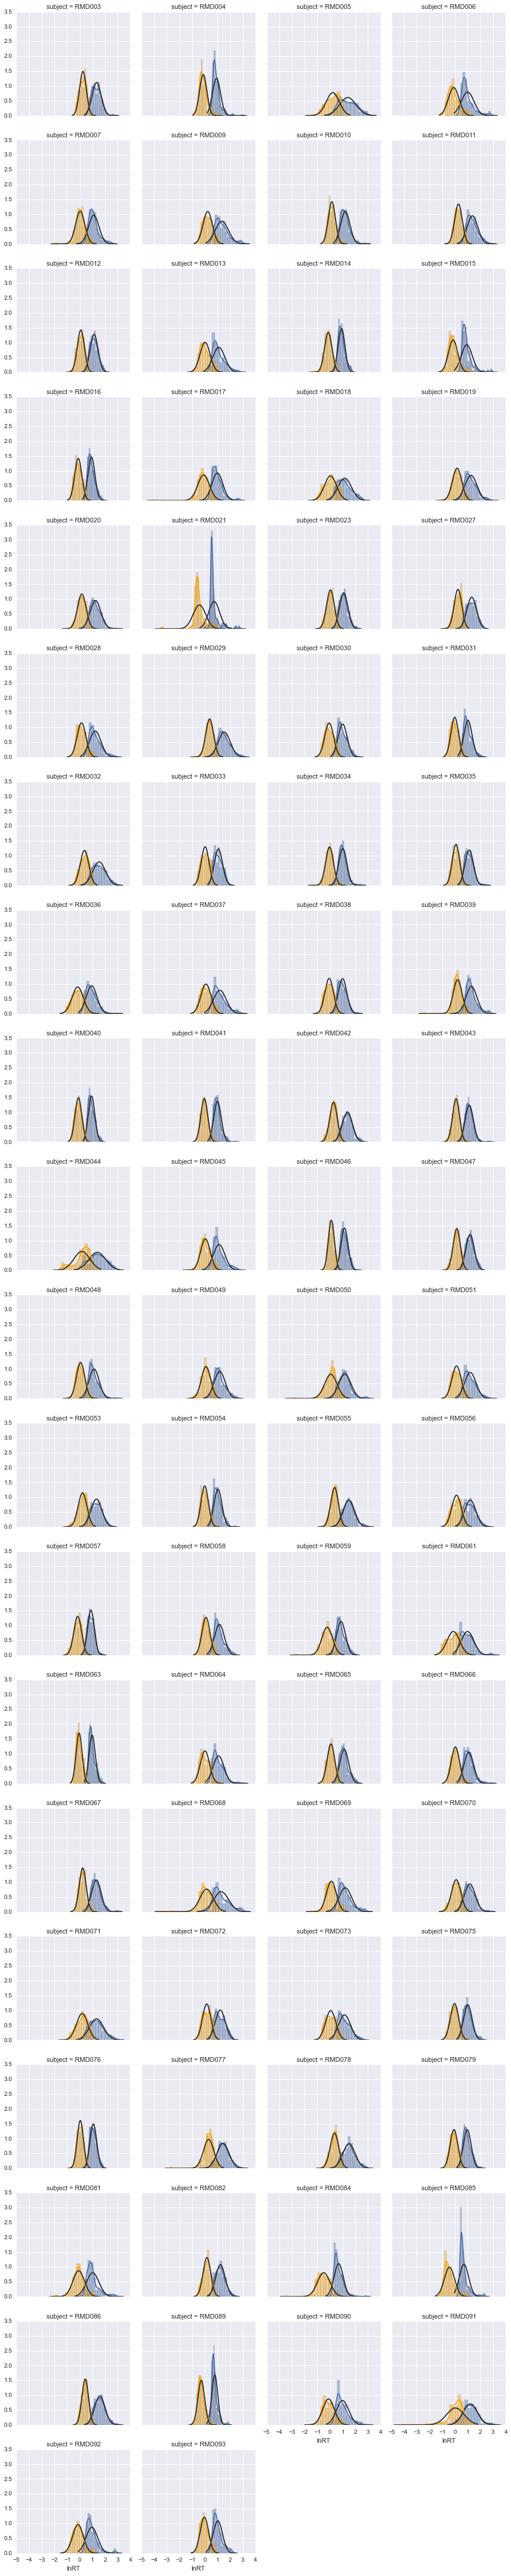

In [31]:
# Single subject data, raw and log transformed RT with normal distribution overlaid to 
#detect deviations.
fg1 = sns.FacetGrid(data=train_clean.dropna(axis=0,subset=['trial_RT']),col='subject',
                    col_wrap=4)
fg1.map(sns.distplot,'trial_RT',kde=True,fit=sp.stats.norm) 
fg1.map(sns.distplot,'lnRT',kde=True,fit=sp.stats.norm,color='orange')

In [32]:
%Rpush train_clean

%R train_rt <- aov_ez(id='subject', dv='lnRT', data=train_clean, between='group', within=c('pair','block'))
%R print(train_rt)

/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Contrasts set to contr.sum for the following variables: group

  res = super(Function, self).__call__(*new_args, **new_kwargs)


            Effect           df  MSE         F   ges p.value
1            group        1, 74 0.39      2.52   .02     .12
2             pair 1.95, 143.99 0.04    2.84 +  .005     .06
3       group:pair 1.95, 143.99 0.04      0.25 .0004     .77
4            block 1.78, 131.41 0.08 36.78 ***   .09  <.0001
5      group:block 1.78, 131.41 0.08      0.37  .001     .67
6       pair:block 4.99, 369.05 0.01      0.70 .0007     .63
7 group:pair:block 4.99, 369.05 0.01      0.22 .0002     .95


In [33]:
# Computing the difference scores for block 4 minus block 1 for RT
g = train_clean.groupby(['subject','group','pair','block'])['lnRT'].mean()
df = g.to_frame()
df.reset_index(inplace=True)
train_block_rt = df.pivot_table(index=['subject','group','pair'],columns='block',values='lnRT')
train_block_rt.reset_index(inplace=True)
train_block_rt.head()
new_cols = ['subject','group','pair','Block1_rt','Block2_rt','Block3_rt','Block4_rt']
train_block_rt.columns = new_cols
train_block_rt['B4_B1_rt'] = train_block_rt['Block4_rt']-train_block_rt['Block1_rt']
train_block_rt.head(2)

,subject,group,pair,Block1_rt,Block2_rt,Block3_rt,Block4_rt,B4_B1_rt
0,RMD003,MDD,AB,0.396788,0.300072,0.185677,0.109119,-0.28767
1,RMD003,MDD,CD,0.432061,0.308623,0.142429,0.068231,-0.36383


In [34]:
# some people only have 3 complete blocks, so dropping them for now
train_block_rt = train_block_rt[np.isfinite(train_block_rt['Block4_rt'])]

In [35]:
%Rpush train_block_rt
%R train_brt_afex <- aov_ez(id='subject', dv='B4_B1_rt', data=train_block_rt, between='group',\
                            within=c('pair'))

%R print (train_brt_afex)

      Effect           df  MSE    F   ges p.value
1      group        1, 74 0.14 0.57  .006     .45
2       pair 1.88, 138.90 0.02 0.19 .0005     .82
3 group:pair 1.88, 138.90 0.02 0.12 .0004     .87


/Users/ebarrick/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


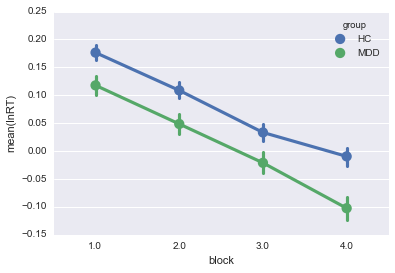

In [36]:
#Let's look at the RT over blocks
sns.pointplot(x="block", y="lnRT", hue="group", data=train_clean, hue_order=['HC','MDD'])

/Users/ebarrick/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:3006: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


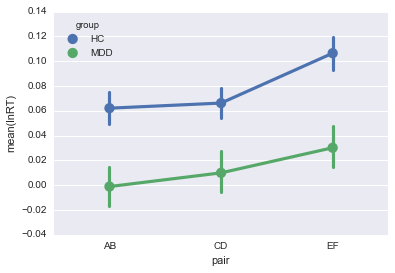

In [37]:
sns.pointplot(x='pair', y = 'lnRT', hue='group', data = train_clean, hue_order=['HC','MDD'], x_order=['AB','CD','EF'])

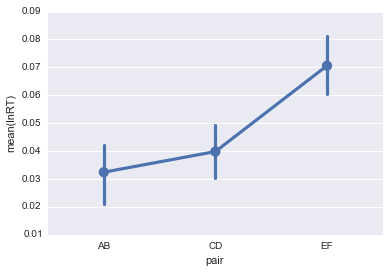

In [38]:
sns.pointplot(x='pair', y = 'lnRT', data = train_clean, x_order = ['AB','CD','EF'])

### Train Accuracy

In [39]:
%Rpush train_clean
%R train_acc_afex <- aov_ez(id='subject', dv='accuracy', data=train_clean, between='group',\
                            within=c('pair','block'))

%R print (train_acc_afex)

            Effect           df  MSE         F  ges p.value
1            group        1, 74 0.17    3.16 +  .01     .08
2             pair 1.68, 124.03 0.08 23.90 ***  .08  <.0001
3       group:pair 1.68, 124.03 0.08      0.77 .003     .44
4            block 2.66, 196.65 0.04 10.02 ***  .02  <.0001
5      group:block 2.66, 196.65 0.04      1.00 .002     .39
6       pair:block 5.17, 382.87 0.03      1.16 .004     .33
7 group:pair:block 5.17, 382.87 0.03      1.21 .004     .30


In [40]:
print 100*(train_clean.groupby(['group','pair'])['accuracy'].mean())

print ('Between-group t-tests on accuracy')
misc.ttest_2s(train_clean[train_clean.group == 'HC']['accuracy'],
              train_clean[train_clean.group == 'MDD']['accuracy'])

group  pair
HC     AB      79.112929
       CD      70.157233
       EF      61.470773
MDD    AB      71.332149
       CD      65.978648
       EF      59.065156
Name: accuracy, dtype: float64
Between-group t-tests on accuracy
t(17988) = 6.89, p = 0.000


(6.8858287183886393, 5.9349632036958331e-12)

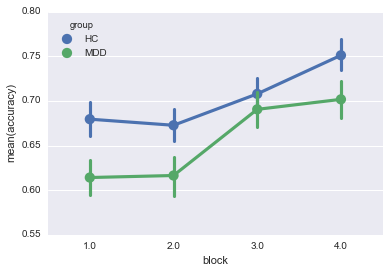

In [41]:
#Accuracy over blocks
sns.pointplot(x="block", y="accuracy", hue="group", data=train_clean, hue_order=['HC','MDD'])

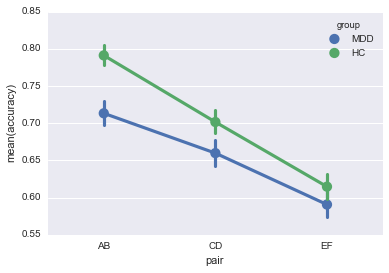

In [42]:
#Accuracy between pairs
sns.pointplot(x="pair", y="accuracy", hue="group", data=train_clean,x_order=['AB','CD','EF'])

In [43]:
# Computing the difference scores for block 4 minus block 1 for accuracy
g = train_clean.groupby(['subject','group','pair','block'])['accuracy'].mean()
df = g.to_frame()
df.reset_index(inplace=True)
train_block_acc = df.pivot_table(index=['subject','group','pair'],columns='block',
                                 values='accuracy')
train_block_acc.reset_index(inplace=True)
train_block_acc.head()
new_cols = ['subject','group','pair','Block1_acc','Block2_acc','Block3_acc','Block4_acc']
train_block_acc.columns = new_cols
train_block_acc['B4_B1_acc'] = train_block_acc['Block4_acc']-train_block_acc['Block1_acc']
train_block_acc.head(2)

,subject,group,pair,Block1_acc,Block2_acc,Block3_acc,Block4_acc,B4_B1_acc
0,RMD003,MDD,AB,0.65,1.00,0.90,0.95,0.3
1,RMD003,MDD,CD,0.60,0.75,0.95,0.80,0.2


In [44]:
#Some people only have 3 compelted blocks, so I'm dropping them for now...
train_block_acc = train_block_acc[np.isfinite(train_block_acc['Block4_acc'])]

In [45]:
%Rpush train_block_acc
%R train_bacc_afex <- aov_ez(id='subject', dv='B4_B1_acc', data=train_block_acc,\
                             between='group', within=c('pair'))

%R print (train_bacc_afex)

      Effect           df  MSE    F   ges p.value
1      group        1, 74 0.09 0.40  .002     .53
2       pair 1.75, 129.21 0.06 0.65  .005     .50
3 group:pair 1.75, 129.21 0.06 0.12 .0009     .86


## PST Ratings

In [46]:
%cd {path2data}

e_dfs = []
ef_d = re.compile('fMRI_ratings')

subjects = !ls -d RMD0*

for subject in subjects:
    curr_path = path2data + subject + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            ef_m = ef_d.search(filename)
            if ef_m:
                file_path = curr_path + filename
                e_df = pd.read_csv(file_path)
                e_df['subject'] = subject
                e_dfs.append(e_df)
                
PST_ratings = pd.concat(e_dfs)
ratings_columns = ['subject','stimulus','prompt','rating']
PST_ratings = PST_ratings.reindex(columns=ratings_columns)

/Users/ebarrick/Work/Expts/REWMEM/Version4/Data


In [47]:
# add group into df
groups = train_clean[['subject', 'group']].copy()
ratings = pd.merge(left=PST_ratings, right=groups, left_on='subject',right_on='subject')
# ratings.reset_index()

In [48]:
ratings.head()

,subject,stimulus,prompt,rating,group
0,RMD003,reward,valence,9,MDD
1,RMD003,reward,valence,9,MDD
2,RMD003,reward,valence,9,MDD
3,RMD003,reward,valence,9,MDD
4,RMD003,reward,valence,9,MDD


In [49]:
valence = ratings[ratings.prompt == 'valence']

In [50]:
%Rpush valence
%R rating_val <- aov_ez(id='subject', dv='rating', data=valence, between='group', within=c('stimulus'))

%R print (rating_val)

          Effect    df  MSE          F ges p.value
1          group 1, 76 1.74     5.03 * .02     .03
2       stimulus 1, 76 3.93 157.77 *** .59  <.0001
3 group:stimulus 1, 76 3.93       1.37 .01     .25


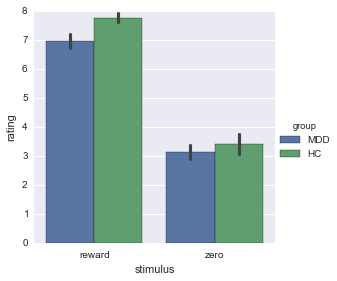

In [51]:
sns.factorplot(y='rating',x='stimulus',hue='group',units='subject',ci=68,kind='bar',data=valence)

In [52]:
arousal = ratings[ratings.prompt == 'arousal']

In [53]:
%Rpush arousal
%R rating_ar <- aov_ez(id='subject', dv='rating', data=arousal, between='group', within=c('stimulus'))

%R print (rating_ar)

          Effect    df  MSE         F    ges p.value
1          group 1, 76 4.03      0.00 <.0001     .97
2       stimulus 1, 76 2.55 34.35 ***    .15  <.0001
3 group:stimulus 1, 76 2.55      1.76   .009     .19


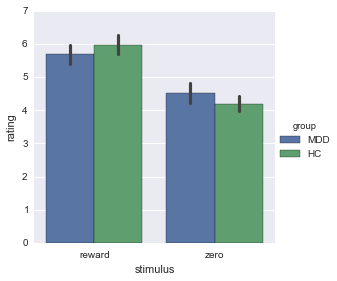

In [54]:
sns.factorplot(y='rating',x='stimulus',hue='group',units='subject',ci=68,kind='bar',data=arousal)

# PST Test

In [55]:
'''Assemble the PST test data'''

%cd {path2data}

e_dfs = []
ef_d = re.compile('PST_test')

subjects = !ls -d RMD0*

for subject in subjects:
    curr_path = path2data + subject + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            ef_m = ef_d.search(filename)
            if ef_m:
                file_path = curr_path + filename
                e_df = pd.read_csv(file_path)
                e_df['subject'] = subject
                e_dfs.append(e_df)
                
test_data = pd.concat(e_dfs)
test_data['lnRT'] = test_data.trial_RT.apply(np.log)
test_columns = ['subject','group','block_id','trial_id','trial_RT','lnRT','trial_accuracy',
                'left_stim_name','left_stim_number','right_stim_name','right_stim_number',
                'response']

/Users/ebarrick/Work/Expts/REWMEM/Version4/Data


In [56]:
test_data['group'].replace(0, 'HC',inplace=True)
test_data['group'].replace(1, 'MDD',inplace=True)

test_data = test_data.reindex(columns=test_columns)

In [57]:
#Merging the PST test data with the self report data
test_full = pd.merge(left=test_data, right=sr, left_on='subject',right_on='subject')

In [58]:
"""Looking for outliers"""

test = OutCheck(test_full)

print ('Number of trials that are outliers for each subject:')
df2 = test[test['outlier'] == 1]
print (df2.groupby('subject')['outlier'].count())

Number of trials that are outliers for each subject:
subject
RMD003    2
RMD004    1
RMD005    1
RMD006    4
RMD007    3
RMD009    1
RMD010    1
RMD011    1
RMD012    2
RMD013    1
RMD014    6
RMD015    5
RMD016    4
RMD017    3
RMD018    2
RMD019    2
RMD020    1
RMD021    2
RMD023    1
RMD027    1
RMD028    6
RMD029    5
RMD030    3
RMD031    2
RMD032    1
RMD033    3
RMD034    1
RMD035    1
RMD036    3
RMD037    1
RMD038    2
RMD040    3
RMD041    1
RMD042    4
RMD043    1
RMD044    1
RMD045    1
RMD046    1
RMD047    4
RMD048    1
RMD049    4
RMD050    1
RMD051    1
RMD053    1
RMD054    1
RMD055    1
RMD056    4
RMD057    2
RMD058    1
RMD059    4
RMD061    5
RMD064    1
RMD065    1
RMD066    2
RMD067    1
RMD068    1
RMD069    4
RMD070    2
RMD071    4
RMD072    2
RMD073    2
RMD075    1
RMD076    2
RMD077    1
RMD078    2
RMD079    2
RMD081    2
RMD084    1
RMD085    1
RMD086    1
RMD089    2
RMD090    3
RMD091    3
RMD092    1
RMD093    3
Name: outlier, dtype: int64


In [59]:
# Count number of trials with no response, drop them, and drop outliers.
print 'Number of trials with no response: ' + str(len(test[test.trial_RT == 999])) 
test_clean = test[~((test.trial_RT == 999) | (test.outlier == 1))]

Number of trials with no response: 44


In [60]:
#Make a pair column
def make_test_pair(data):
    '''take left and right stimulus output pair'''
    left_stim, right_stim = data
    d = {1:'A', 2:'C',3:'E',4:'F',5:'D',6:'B'}
    left_char = d[left_stim]
    right_char = d[right_stim]
    pair = left_char + right_char
    return pair

test_clean['pair'] = test_clean[['left_stim_number','right_stim_number']].apply((make_test_pair), axis=1)

In [61]:
def choice_type(data):
    '''catgorize choice pairs'''
    
    d = {'AC':'ChooseA', 'CA':'ChooseA', 'AD':'ChooseA', 'DA':'ChooseA','AE':'ChooseA','EA':'ChooseA','AF':'ChooseA',
         'FA':'ChooseA',
         
         'BC':'AvoidB','CB':'AvoidB','BD':'AvoidB','DB':'AvoidB','EB':'AvoidB','BE':'AvoidB','BF':'AvoidB','FB':'AvoidB',
          
         'AB':'neither','BA':'neither','CD':'neither','DC':'neither','CE':'neither','EC':'neither','CF':'neither','FC':'neither',
         'ED':'neither','DE':'neither','DF':'neither','FD':'neither','EF':'neither','FE':'neither'}

    pair = d[data]
    return pair

test_clean['choice'] = test_clean.pair.apply(choice_type)

In [62]:
#Find out which participants responded <90% of the time -- none!
g = test_clean.groupby(['subject', 'group']).trial_id.count()
df = g.to_frame()
df.reset_index(inplace=True)

df.loc[(df["trial_id"] < 162)]

,subject,group,trial_id


In [63]:
test_clean.head()

,subject,group,block_id,trial_id,trial_RT,lnRT,trial_accuracy,left_stim_name,left_stim_number,right_stim_name,right_stim_number,response,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,Highest Degree,Income,Notes,Eligible,BDI_total,CC_total,BAS_D,BAS_FS,BAS_RR,BIS,MASQ_GDA,MASQ_AA,MASQ_GDD,MASQ_AD,AES_total,STAI_Trait,STAI_State,SHAPS,PSQI_Duration,PSQI_Disturb,PSQI_Latency,PSQI_DayDys,PSQI_Efficiency,PSQI_Quality,PSQI_Medication,PSQI_Total,TCI_NovSeek,TCI_HA,TCI_RewDep,TCI_Persist,TCI_SelfDir,TCI_CoOp,TCI_SelfTrans,TCI_Valid,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,POMS_TenseAnx,POMS_DepDeject,POMS_AngHost,POMS_VigorAct,POMS_FatigueInert,POMS_ConfuseBewild,POMS_TotalMoodDisturb,WTAR_NatEng,WTAR_StdScore,outlier,pair,choice
0,RMD003,MDD,1,1,1.394,0.332177,0,Stimuli/6.bmp,1,Stimuli/1.bmp,2,right,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,AC,ChooseA
2,RMD003,MDD,1,3,1.247,0.220741,1,Stimuli/4.bmp,3,Stimuli/3.bmp,6,left,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,EB,AvoidB
3,RMD003,MDD,1,4,1.195,0.178146,1,Stimuli/4.bmp,3,Stimuli/5.bmp,5,left,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,ED,neither
4,RMD003,MDD,1,5,1.414,0.346423,0,Stimuli/3.bmp,6,Stimuli/5.bmp,5,left,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,BD,AvoidB
6,RMD003,MDD,1,7,0.845,-0.168419,0,Stimuli/1.bmp,2,Stimuli/4.bmp,3,right,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,CE,neither


### Test Reaction Time

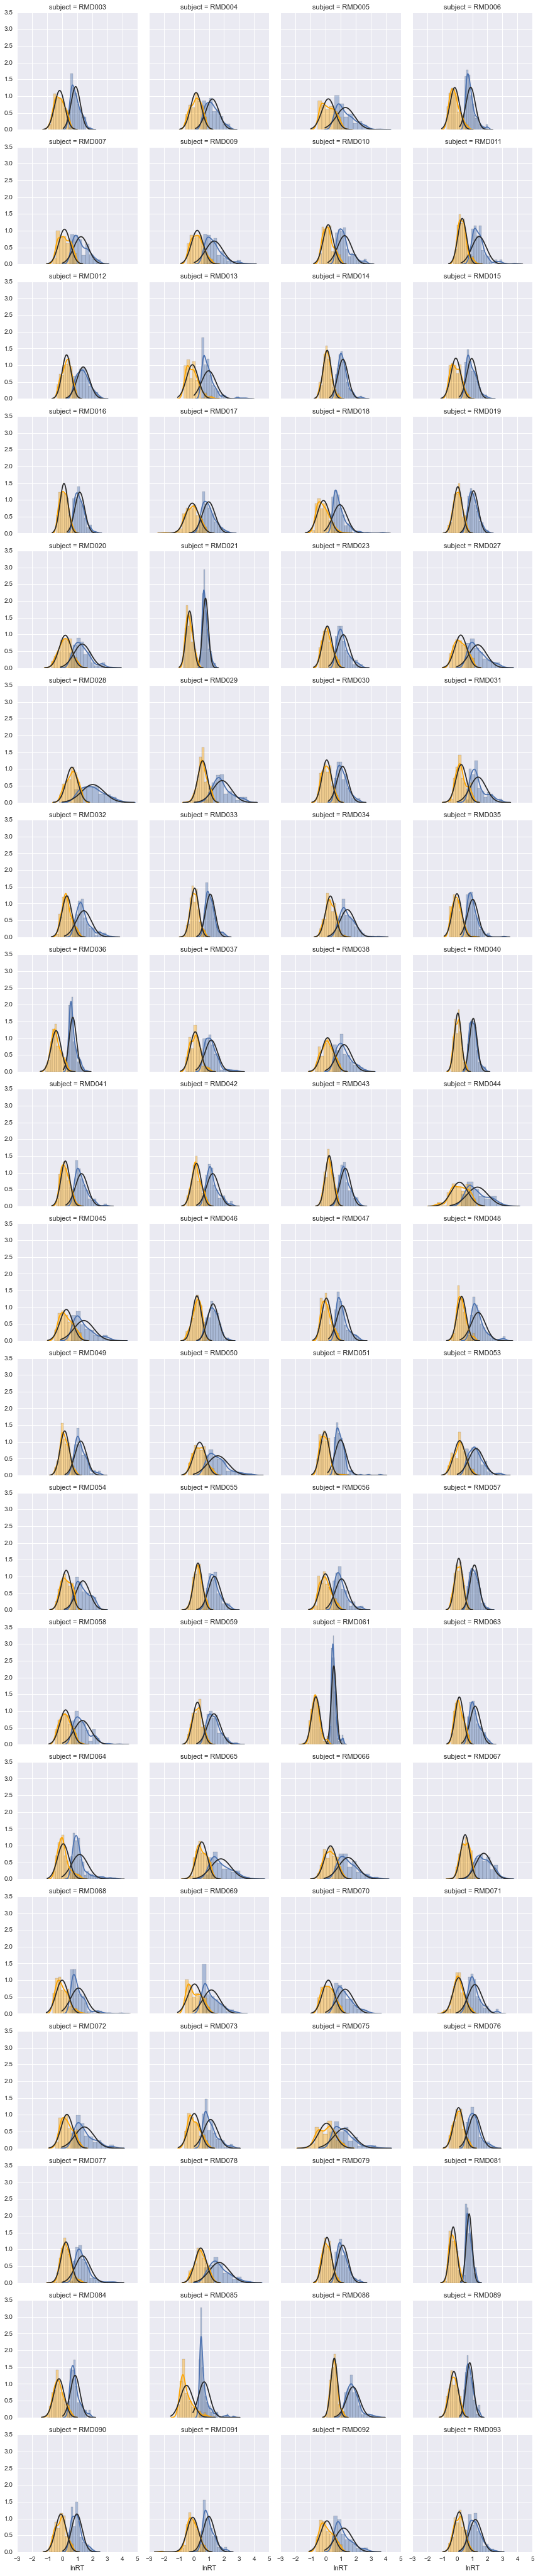

In [64]:
# Single subject data, raw and log transformed RT with normal distribution overlaid to 
#detect deviations.
fg1 = sns.FacetGrid(data=test_clean.dropna(axis=0,subset=['trial_RT']),col='subject',
                    col_wrap=4)
fg1.map(sns.distplot,'trial_RT',kde=True,fit=sp.stats.norm) 
fg1.map(sns.distplot,'lnRT',kde=True,fit=sp.stats.norm,color='orange')

In [65]:
test_choice = test_clean[~(test_clean.choice == 'neither')]

In [66]:
%Rpush test_choice

%R test_rt <- aov_ez(id='subject', dv='lnRT', data=test_choice, between='group', within='choice')
%R print(test_rt)

        Effect    df  MSE         F  ges p.value
1        group 1, 74 0.10    3.93 +  .04     .05
2       choice 1, 74 0.02 22.26 ***  .05  <.0001
3 group:choice 1, 74 0.02      2.28 .005     .14


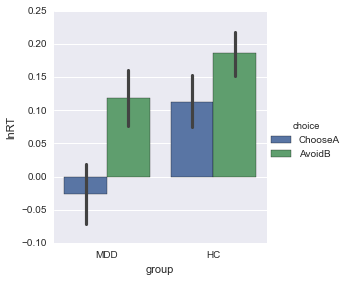

In [67]:
sns.factorplot(y='lnRT',x='group',hue='choice',units='subject',ci=68,kind='bar',data=test_choice,
              order = ['MDD','HC'])

In [68]:
test_choice.lnRT.describe()

count    7218.000000
mean        0.100042
std         0.417061
min        -1.316768
25%        -0.194495
50%         0.091667
75%         0.380489
max         1.378262
Name: lnRT, dtype: float64

In [88]:
r = test_choice.groupby(['subject','group','choice'])['lnRT'].mean()
rt = r.to_frame()
rt.reset_index(inplace = True)
rt.head()

,subject,group,choice,lnRT
0,RMD003,MDD,AvoidB,-0.187214
1,RMD003,MDD,ChooseA,-0.065150
2,RMD004,HC,AvoidB,0.175552
3,RMD004,HC,ChooseA,0.026598
4,RMD005,HC,AvoidB,0.084906


In [90]:
#Between groups test on AvoidB RT
misc.ttest_2s(rt[(rt.group == 'HC') & (rt.choice == 'AvoidB')]['lnRT'],
              rt[(rt.group == 'MDD') & (rt.choice == 'AvoidB')]['lnRT'])

t(74) = 1.20, p = 0.234


(1.2003728365534152, 0.233823200726718)

In [91]:
#Between groups test on ChooseA RT
misc.ttest_2s(rt[(rt.group == 'HC') & (rt.choice == 'ChooseA')]['lnRT'],
              rt[(rt.group == 'MDD') & (rt.choice == 'ChooseA')]['lnRT'])

t(74) = 2.40, p = 0.019


(2.4029506088077035, 0.018770588705679374)

In [97]:
t = test_choice.groupby(['subject','trial_accuracy','group'])['lnRT'].mean()
rt2 = t.to_frame()
rt2.reset_index(inplace = True)
rt2.head()

,subject,trial_accuracy,group,lnRT
0,RMD003,0,MDD,-0.088826
1,RMD003,1,MDD,-0.153416
2,RMD004,0,HC,-0.106122
3,RMD004,1,HC,0.112459
4,RMD005,0,HC,0.185629


In [99]:
#Between groups test on RT for correct trials
misc.ttest_2s(rt2[(rt2.group == 'HC') & (rt2.trial_accuracy == 1)]['lnRT'],
              rt2[(rt2.group == 'MDD') & (rt2.trial_accuracy == 1)]['lnRT'])

t(74) = 2.21, p = 0.030


(2.2061138047133642, 0.030480105693953319)

In [96]:
#Between groups test on RT for incorrect trials
misc.ttest_2s(a2[(a2.group == 'HC') & (a2.trial_accuracy == 0)]['lnRT'],
              a2[(a2.group == 'MDD') & (a2.trial_accuracy == 0)]['lnRT'])

t(72) = 0.38, p = 0.706


(0.37883175613095266, 0.70592764366401872)

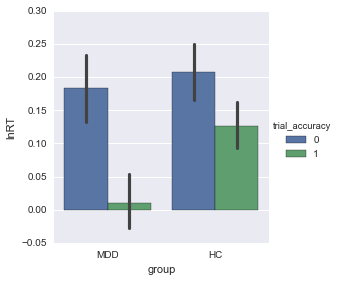

In [101]:
sns.factorplot(y='lnRT',x='group',hue='trial_accuracy',units='subject',ci=68,kind='bar',data=rt2,
              order = ['MDD','HC'])

### Test Accuracy

In [113]:
%R test_acc <- aov_ez(id='subject',dv='trial_accuracy', within='choice', between='group', data=test_choice)
%R print(test_acc)

        Effect    df  MSE    F  ges p.value
1        group 1, 74 0.05 2.47  .01     .12
2       choice 1, 74 0.08 0.39 .003     .53
3 group:choice 1, 74 0.08 1.11 .009     .29


In [110]:
a = test_choice.groupby(['subject','choice','group'])['trial_accuracy'].mean()
a2 = a.to_frame()
a2.reset_index(inplace = True)
a2.head()

,subject,choice,group,trial_accuracy
0,RMD003,AvoidB,MDD,0.723404
1,RMD003,ChooseA,MDD,0.416667
2,RMD004,AvoidB,HC,0.937500
3,RMD004,ChooseA,HC,0.958333
4,RMD005,AvoidB,HC,0.979167


        Effect    df  MSE    F  ges p.value
1        group 1, 74 0.05 2.47  .01     .12
2       choice 1, 74 0.08 0.39 .003     .53
3 group:choice 1, 74 0.08 1.11 .009     .29


In [119]:
#Between groups AvoidB accuracy
misc.ttest_2s(a2[(a2.group == 'HC') & (a2.choice == 'AvoidB')]['trial_accuracy'],
              a2[(a2.group == 'MDD') & (a2.choice == 'AvoidB')]['trial_accuracy'])

t(74) = 1.83, p = 0.071


(1.8302638360934711, 0.071237329147950973)

In [105]:
#Between groups ChooseA accuracy
misc.ttest_2s(a2[(a2.group == 'HC') & (a2.choice == 'ChooseA')]['trial_accuracy'],
             a2[(a2.group == 'MDD') & (a2.choice == 'ChooseA')]['trial_accuracy'])

t(74) = 0.17, p = 0.865


(0.17060963970663712, 0.86499633648600593)

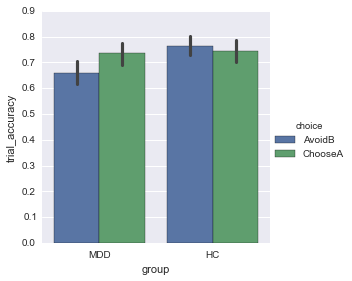

In [108]:
sns.factorplot(y='trial_accuracy',x='group',hue='choice',units='subject',ci=68,kind='bar',data=a2,
              order = ['MDD','HC'])